In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

import io
data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')), index_col = False, )

In [ ]:
data.drop('id', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
data.shape

(569, 32)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.dtypes.value_counts()

float64    31
object      1
dtype: int64

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'


In [ ]:
array = data.values
X = array[:,1:31]
y = array[:,0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(Xs)

In [ ]:

X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

print(X_pca[:,1])

# PCA_df['PCA_1'] = X_pca[:,0]
# PCA_df['PCA_2'] = X_pca[:,1]

# plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
# plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

# plt.xlabel('PCA_1')
# plt.ylabel('PCA_2')
# plt.legend(['Malignant','Benign'])
# plt.show()

[-2.13233366e+00  2.49023830e+00  1.55940285e+00  9.29632114e-02
  1.72191520e+00  8.92339345e-01  3.65545395e+00 -3.85802226e-01
 -3.23743375e+00 -1.50755217e+00  1.17473563e+00  2.23175544e+00
 -1.63990032e+00 -1.02334916e-01 -1.83636826e+00 -3.12664525e+00
  3.97335920e+00 -1.96197651e+00  9.99252462e-01  5.19843752e-01
  3.54463748e+00  2.10711215e+00  2.47006619e+00 -1.99390932e-01
 -2.37917681e+00  6.46858328e-01 -2.18963300e+00 -9.45879050e-01
 -1.71485489e+00 -1.83748058e+00 -5.25024643e-01 -4.87489286e-01
 -1.76700704e+00  2.57698592e-01 -7.43108503e-01 -2.41407109e+00
  1.61006202e+00 -1.52651951e+00  1.71518506e+00 -1.59451070e+00
  2.18419281e+00  9.17143347e-01  2.18539961e-01 -2.08233070e+00
  3.07439739e+00  2.61856125e-01  1.24832226e+00 -1.38833588e+00
  1.08235053e+00  4.88624312e+00 -3.17151004e-01 -3.87793875e+00
  3.16508893e+00 -2.78176021e+00 -1.27030625e+00  2.24921280e+00
  2.29035407e+00 -2.10733862e+00  1.96888104e-01 -3.98355549e+00
  3.03408396e-01  4.12443

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X_train)
Xse = scaler.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# feature extraction
lda = LinearDiscriminantAnalysis(n_components=1)
fit = lda.fit(X_train, y_train)



In [ ]:

for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    X = lda.transform(Xs)
    plt.scatter(fit[X==l,0], fit[X==l,0], c=c, marker=m, label=l,edgecolors='black')
    plt.xlabel('PCA_1')
    plt.ylabel('PCA_2')
    plt.legend(['Malignant','Benign'])
    

TypeError: ignored

In [ ]:
for c, i, target_name in zip("rgb", [0, 1, 2], [2, 3, 4]):
    
    plt.scatter(fit[X == i, 0], fit[X == i, 1], c=c, label=target_name)

plt.show()
plt.plot([-6,2],[-6,4],"k-")
plt.plot([5,0],[-6,4],"k-")
plt.legend()
plt.title('LDA of WINE dataset')
plt.show()

IndexError: ignored

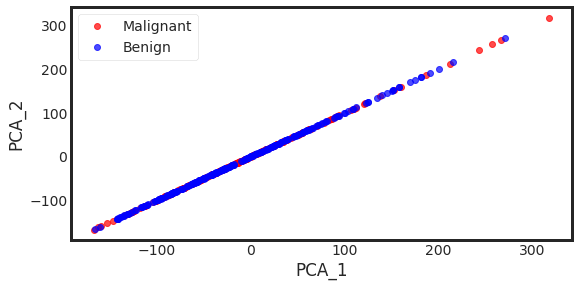

In [ ]:
X_pca = lda.transform(Xs)

PCA_df = pd.DataFrame()


PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,0:1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [ ]:
var= lda.explained_variance_ratio_.sum()
print(var)

1.0


[1.]


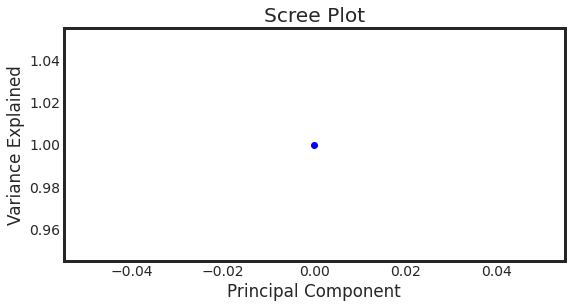

In [ ]:
#The amount of variance that each PC explains
# var= lda.explained_variance_ratio_
# print(var)
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)
plt.plot(lda.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# plt.plot(var)
# plt.title('Scree Plot')
# plt.xlabel('Linear Discrimiant Analysis')
# plt.ylabel('Eigenvalue')

# leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
# leg.get_frame().set_alpha(0.4)
# plt.show()

In [ ]:
data.describe()

In [ ]:
data.skew()

In [ ]:
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])